<a href="https://colab.research.google.com/github/Y-sebaei/Authorship-Recognition-For-Large-Language-Models/blob/main/Bachelor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *

In [ ]:
import pandas as pd

# Load JSON Lines file into a DataFrame
file_path = "Bachtrain.jsonl"
df = pd.read_json(file_path, lines=True)



df.to_csv("dataset3.csv", index=False)


In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer


tokenized_text = [text.split() for text in df['text']]


word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)


word_embeddings = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv], axis=0)
                   for words in tokenized_text]


tfidf_vectorizer = TfidfVectorizer()


tfidf_features = tfidf_vectorizer.fit_transform(df['text'])

df['text_length'] = df['text'].apply(len)

In [ ]:
df.shape

(3152, 6)

In [ ]:
df.head()


,text,model,source,label,id,text_length
0,Forza Motorsport is a popular racing game that...,chatGPT,wikihow,1,0,2244
1,Buying Virtual Console games for your Nintendo...,chatGPT,wikihow,1,1,3728
2,Windows NT 4.0 was a popular operating system ...,chatGPT,wikihow,1,2,5237
3,How to Make Perfume\n\nPerfume is a great way ...,chatGPT,wikihow,1,3,4729
4,How to Convert Song Lyrics to a Song'\n\nConve...,chatGPT,wikihow,1,4,3095


In [ ]:
df.tail()

,text,model,source,label,id,text_length
3147,\n\nWe investigate the entanglement and topolo...,cohere,arxiv,2,42042,1133
3148,\n\nWe present a catalog of 75 Seyfert galaxie...,cohere,arxiv,2,42043,1176
3149,\n\nAbstract for: Astrophysical Accretion as a...,cohere,arxiv,2,42044,1362
3150,\n\nConnectivity measures how strongly nodes i...,cohere,arxiv,2,42045,1433
3151,\nWe present a theory of the intrinsic generat...,cohere,arxiv,2,42046,1011


In [ ]:
df.describe()

,label,id,text_length
count,3152.000000,3152.000000,3152.000000
mean,2.032360,24057.691307,2374.441307
std,0.822698,16984.805971,1436.821318
min,1.000000,0.000000,194.000000
25%,1.000000,787.750000,1343.000000
50%,2.000000,29588.500000,1944.500000
75%,3.000000,41258.250000,2833.500000
max,3.000000,42046.000000,13989.000000


In [ ]:
data_train = df.sample(frac=0.8, random_state=123)

In [ ]:
data_train.head()

,text,model,source,label,id,text_length
1975,The answer to your question is a bit complicat...,davinci,reddit,3,29988,2035
957,Fishing can be a relaxing and rewarding activi...,chatGPT,wikihow,1,957,3254
1643,The Europeans who searched for the Northwest P...,davinci,reddit,3,29656,1907
1397,"In the days of knights and kings, people were ...",davinci,reddit,3,29410,1423
1901,The strategic value of North Africa in World W...,davinci,reddit,3,29914,2030


In [ ]:
data_test = df.drop(data_train.index)

In [ ]:
data_test.shape

(630, 6)

In [ ]:
data_train.reset_index(drop=True, inplace=True)

In [ ]:
data_train.head()

,text,model,source,label,id,text_length
0,The answer to your question is a bit complicat...,davinci,reddit,3,29988,2035
1,Fishing can be a relaxing and rewarding activi...,chatGPT,wikihow,1,957,3254
2,The Europeans who searched for the Northwest P...,davinci,reddit,3,29656,1907
3,"In the days of knights and kings, people were ...",davinci,reddit,3,29410,1423
4,The strategic value of North Africa in World W...,davinci,reddit,3,29914,2030


In [ ]:
data_test.reset_index(drop=True, inplace=True)

In [ ]:
data_test.head()

,text,model,source,label,id,text_length
0,Buying Virtual Console games for your Nintendo...,chatGPT,wikihow,1,1,3728
1,How to Make Perfume\n\nPerfume is a great way ...,chatGPT,wikihow,1,3,4729
2,Publishing your WordPress theme on Themeforest...,chatGPT,wikihow,1,6,3091
3,Teaching your dog new tricks is a great way to...,chatGPT,wikihow,1,8,4576
4,Making Phyllo Dough is a skill that will impre...,chatGPT,wikihow,1,14,3056


In [ ]:
columns_to_ignore = ['label', 'source','id']
clf = setup(data=data_train, target='model', session_id=123, ignore_features=columns_to_ignore, fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,model
2,Target type,Multiclass
3,Target mapping,"chatGPT: 0, cohere: 1, davinci: 2"
4,Original data shape,"(2522, 6)"
5,Transformed data shape,"(2650, 3)"
6,Transformed train set shape,"(1893, 3)"
7,Transformed test set shape,"(757, 3)"
8,Ignore features,3
9,Numeric features,1


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7966,0.9085,0.7966,0.8054,0.7981,0.6945,0.6970,0.1460
lr,Logistic Regression,0.7819,0.0000,0.7819,0.7904,0.7731,0.6743,0.6859,0.7280
nb,Naive Bayes,0.7348,0.9235,0.7348,0.7841,0.7228,0.6052,0.6413,0.1950
ridge,Ridge Classifier,0.5365,0.0000,0.5365,0.5995,0.5004,0.3099,0.3530,0.1200
svm,SVM - Linear Kernel,0.3531,0.0000,0.3531,0.1667,0.1917,0.0456,0.0599,0.1740
xgboost,Extreme Gradient Boosting,0.3393,0.7876,0.3393,0.1265,0.1807,0.0265,0.0304,0.1800
et,Extra Trees Classifier,0.3258,0.7533,0.3258,0.3290,0.1669,0.0083,0.0538,0.2660
dummy,Dummy Classifier,0.3224,0.5000,0.3224,0.1039,0.1572,0.0000,0.0000,0.1160
rf,Random Forest Classifier,0.3218,0.7314,0.3218,0.1326,0.1599,0.0019,0.0071,0.3120
dt,Decision Tree Classifier,0.3201,0.5000,0.3201,0.1025,0.1552,0.0000,0.0000,0.2210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7797,0.9115,0.7797,0.7937,0.7830,0.6680,0.6715
1,0.8644,0.9525,0.8644,0.8654,0.8645,0.7964,0.7967
2,0.7571,0.8640,0.7571,0.7718,0.7611,0.6344,0.6369
3,0.8362,0.9274,0.8362,0.8413,0.8363,0.7544,0.7569
4,0.7797,0.8980,0.7797,0.7952,0.7823,0.6687,0.6724
5,0.7955,0.9243,0.7955,0.7935,0.7926,0.6936,0.6953
6,0.7784,0.8956,0.7784,0.7889,0.7815,0.6667,0.6683
7,0.7955,0.9021,0.7955,0.8031,0.7954,0.6936,0.6974
8,0.7500,0.8941,0.7500,0.7627,0.7534,0.6248,0.6270


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8023,0.9316,0.8023,0.8239,0.8056,0.7016,0.7092
1,0.8644,0.9638,0.8644,0.8718,0.8662,0.7960,0.7977
2,0.7853,0.9077,0.7853,0.8053,0.7901,0.6765,0.6809
3,0.8362,0.9448,0.8362,0.8411,0.8368,0.7543,0.7561
4,0.7684,0.9140,0.7684,0.7993,0.7731,0.6505,0.6588
5,0.8523,0.9617,0.8523,0.8635,0.8534,0.7772,0.7817
6,0.7898,0.9313,0.7898,0.8045,0.7929,0.6836,0.6868
7,0.8239,0.9316,0.8239,0.8313,0.8236,0.7361,0.7400
8,0.7955,0.9237,0.7955,0.8082,0.7990,0.6925,0.6945


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


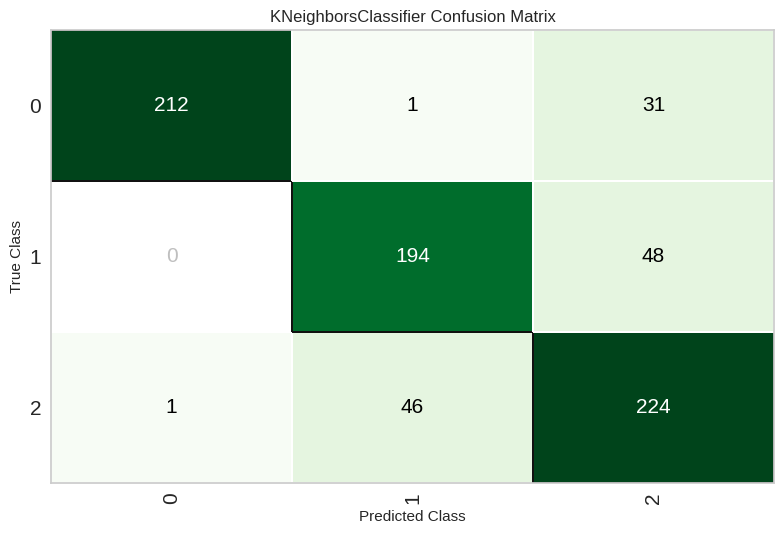

In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

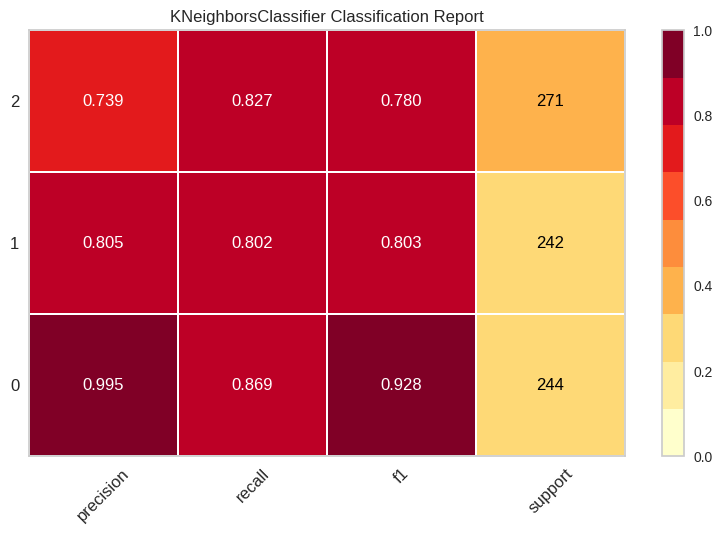

In [ ]:
plot_model(tuned_knn, plot = 'class_report')

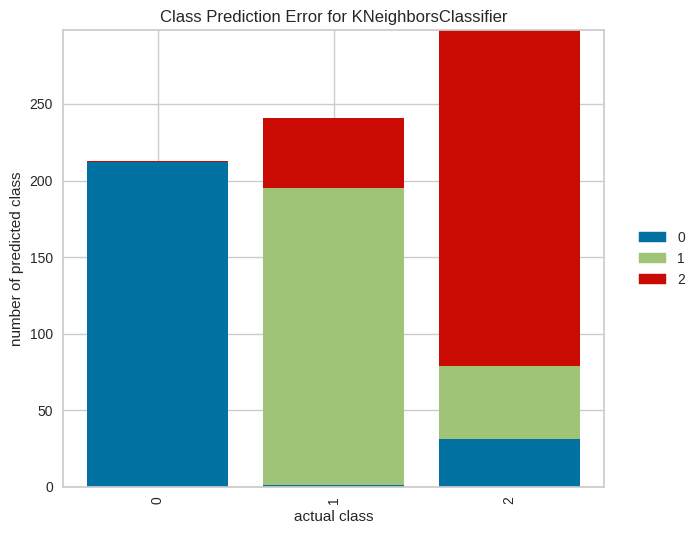

In [ ]:
plot_model(tuned_knn, plot = 'error')

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# New Section

In [ ]:
data_test_filtered = data_test.drop(columns=['label', 'source','id', 'model'])


predict_model(tuned_knn, data=data_test_filtered)

,text,text_length,prediction_label,prediction_score
0,Buying Virtual Console games for your Nintendo...,3728,chatGPT,1.00
1,How to Make Perfume\n\nPerfume is a great way ...,4729,chatGPT,1.00
2,Publishing your WordPress theme on Themeforest...,3091,chatGPT,1.00
3,Teaching your dog new tricks is a great way to...,4576,chatGPT,1.00
4,Making Phyllo Dough is a skill that will impre...,3056,chatGPT,1.00
...,...,...,...,...
625,\n\nWe present a new finite element model for ...,1108,cohere,0.90
626,\nWe present a detailed study of the evolution...,1030,cohere,1.00
627,\n\nWe consider the problem of performing a se...,1514,davinci,0.50
628,\n\nWe investigate the entanglement and topolo...,1133,cohere,0.88


In [ ]:
final_knn = finalize_model(tuned_knn)

In [ ]:
print(final_knn)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['text_length'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy...
                                                              verbose=0))),
                ('balance',
                 TransformerWrapper(exclude=None, include=None,
             

In [ ]:
test_pred = predict_model(final_knn, data = data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8238,0.9318,0.8238,0.8366,0.8262,0.7353,0.7383


In [ ]:
test_pred.head()

,text,source,label,id,text_length,model,prediction_label,prediction_score
0,Buying Virtual Console games for your Nintendo...,wikihow,1,1,3728,chatGPT,chatGPT,1.0
1,How to Make Perfume\n\nPerfume is a great way ...,wikihow,1,3,4729,chatGPT,chatGPT,1.0
2,Publishing your WordPress theme on Themeforest...,wikihow,1,6,3091,chatGPT,chatGPT,1.0
3,Teaching your dog new tricks is a great way to...,wikihow,1,8,4576,chatGPT,chatGPT,1.0
4,Making Phyllo Dough is a skill that will impre...,wikihow,1,14,3056,chatGPT,chatGPT,1.0


In [ ]:
test_pred.tail()

,text,source,label,id,text_length,model,prediction_label,prediction_score
625,\n\nWe present a new finite element model for ...,arxiv,2,42021,1108,cohere,cohere,0.92
626,\nWe present a detailed study of the evolution...,arxiv,2,42034,1030,cohere,cohere,0.98
627,\n\nWe consider the problem of performing a se...,arxiv,2,42037,1514,cohere,cohere,0.54
628,\n\nWe investigate the entanglement and topolo...,arxiv,2,42042,1133,cohere,cohere,0.92
629,\nWe present a theory of the intrinsic generat...,arxiv,2,42046,1011,cohere,cohere,0.96


In [ ]:
save_model(final_knn, 'final_knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['text_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy...
                                                               verbose=0))),
                 ('balance',
                  TransformerWrapper(exclude=None, include=None

In [ ]:
load_model('final_knn')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['text_length'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=n...
                                                              verbose=0))),
                ('balance',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=None,
                                                                              random_state=123,
                                                                              sampling_strategy='auto')))),
                ('actual_estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=50, p=2,
                                      weights='uniform'))],
         verbose=False)

# New Section

In [ ]:

loaded_model = load_model('final_knn')


predictions = predict_model(loaded_model, data=data_test)


print(predictions)


Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8238,0.9318,0.8238,0.8366,0.8262,0.7353,0.7383


                                                  text   source  label     id  \
0    Buying Virtual Console games for your Nintendo...  wikihow      1      1   
1    How to Make Perfume\n\nPerfume is a great way ...  wikihow      1      3   
2    Publishing your WordPress theme on Themeforest...  wikihow      1      6   
3    Teaching your dog new tricks is a great way to...  wikihow      1      8   
4    Making Phyllo Dough is a skill that will impre...  wikihow      1     14   
..                                                 ...      ...    ...    ...   
625  \n\nWe present a new finite element model for ...    arxiv      2  42021   
626  \nWe present a detailed study of the evolution...    arxiv      2  42034   
627  \n\nWe consider the problem of performing a se...    arxiv      2  42037   
628  \n\nWe investigate the entanglement and topolo...    arxiv      2  42042   
629  \nWe present a theory of the intrinsic generat...    arxiv      2  42046   

     text_length    model p

In [ ]:
loaded_model = load_model('final_knn')

Transformation Pipeline and Model Successfully Loaded
